In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [2]:
# Get the stock quote
df = DataReader('DUK', data_source='yahoo', start='2021-01-04', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,92.129997,89.199997,91.779999,89.709999,2683700.0,85.435265
2021-01-05,90.190002,89.040001,89.790001,89.750000,2547400.0,85.473366
2021-01-06,91.769997,89.870003,89.949997,90.910004,2823000.0,86.578087
2021-01-07,91.459999,89.739998,91.150002,89.889999,2989500.0,85.606689
2021-01-08,90.400002,89.419998,89.949997,90.050003,2752100.0,85.759071
...,...,...,...,...,...,...
2022-03-29,110.989998,109.620003,110.129997,110.970001,2461600.0,110.970001
2022-03-30,111.500000,110.400002,111.000000,111.480003,1979300.0,111.480003
2022-03-31,112.550003,111.199997,111.379997,111.660004,3280100.0,111.660004


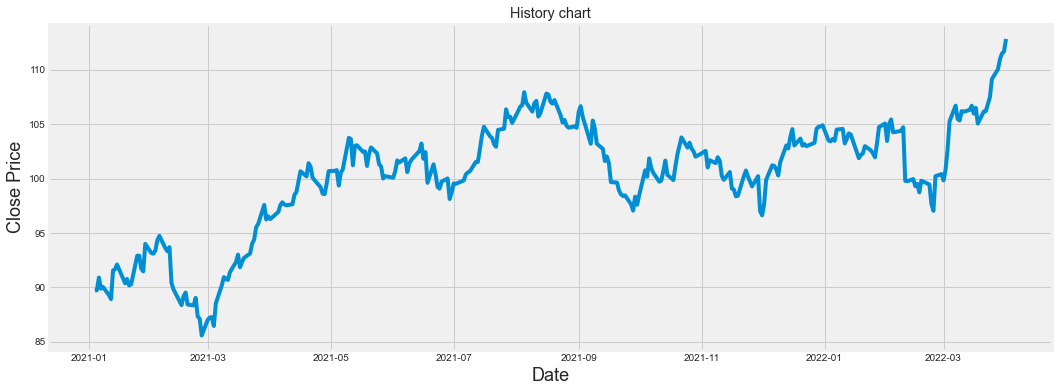

In [3]:
plt.figure(figsize=(16,6))
plt.title('History chart')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [4]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

301

In [5]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.15130379],
       [0.15277279],
       [0.195373  ],
       [0.15791416],
       [0.16379016],
       [0.1358797 ],
       [0.12265896],
       [0.2192435 ],
       [0.22291614],
       [0.23944192],
       [0.17590894],
       [0.19059867],
       [0.16856421],
       [0.17260389],
       [0.26882139],
       [0.26918843],
       [0.22475218],
       [0.21630578],
       [0.30885063],
       [0.27800244],
       [0.2757988 ],
       [0.28644885],
       [0.32170404],
       [0.33602646],
       [0.29416089],
       [0.28387816],
       [0.29783326],
       [0.17737794],
       [0.15534348],
       [0.10246054],
       [0.13257437],
       [0.14469342],
       [0.10429686],
       [0.10135886],
       [0.12669865],
       [0.06426734],
       [0.05618826],
       [0.        ],
       [0.05325025],
       [0.06059498],
       [0.06169666],
       [0.03195015],
       [0.10796923],
       [0.17003321],
       [0.19684172],
       [0.19096599],
       [0.18729363],
       [0.213

In [6]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.15130379, 0.15277279, 0.195373  , 0.15791416, 0.16379016,
       0.1358797 , 0.12265896, 0.2192435 , 0.22291614, 0.23944192,
       0.17590894, 0.19059867, 0.16856421, 0.17260389, 0.26882139,
       0.26918843, 0.22475218, 0.21630578, 0.30885063, 0.27800244,
       0.2757988 , 0.28644885, 0.32170404, 0.33602646, 0.29416089,
       0.28387816, 0.29783326, 0.17737794, 0.15534348, 0.10246054,
       0.13257437, 0.14469342, 0.10429686, 0.10135886, 0.12669865,
       0.06426734, 0.05618826, 0.        , 0.05325025, 0.06059498,
       0.06169666, 0.03195015, 0.10796923, 0.17003321, 0.19684172,
       0.19096599, 0.18729363, 0.21336777, 0.24752129, 0.27286079,
       0.22989355, 0.24752129, 0.2618437 , 0.27653344, 0.30958499,
       0.32317304, 0.36503861, 0.37605598, 0.44032332, 0.39111275])]
[0.4017628017890269]

[array([0.15130379, 0.15277279, 0.195373  , 0.15791416, 0.16379016,
       0.1358797 , 0.12265896, 0.2192435 , 0.22291614, 0.23944192,
       0.17590894, 0.19059867, 0.168

In [7]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=128, epochs=256)

Epoch 1/256
2/2 [==============================] - 8s 189ms/step - loss: 0.3280
Epoch 2/256
2/2 [==============================] - 0s 183ms/step - loss: 0.0811
Epoch 3/256
2/2 [==============================] - 0s 194ms/step - loss: 0.0424
Epoch 4/256
2/2 [==============================] - 0s 192ms/step - loss: 0.0382
Epoch 5/256
2/2 [==============================] - 0s 197ms/step - loss: 0.0083
Epoch 6/256
2/2 [==============================] - 0s 190ms/step - loss: 0.0202
Epoch 7/256
2/2 [==============================] - 0s 193ms/step - loss: 0.0243
Epoch 8/256
2/2 [==============================] - 0s 188ms/step - loss: 0.0161
Epoch 9/256
2/2 [==============================] - 0s 187ms/step - loss: 0.0073
Epoch 10/256
2/2 [==============================] - 0s 188ms/step - loss: 0.0062
Epoch 11/256
2/2 [==============================] - 0s 193ms/step - loss: 0.0110
Epoch 12/256
2/2 [==============================] - 0s 191ms/step - loss: 0.0108
Epoch 13/256
2/2 [===================

In [8]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1.6277687670407066

C:\Users\ASUS\AppData\Local\Temp/ipykernel_15560/1906463444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


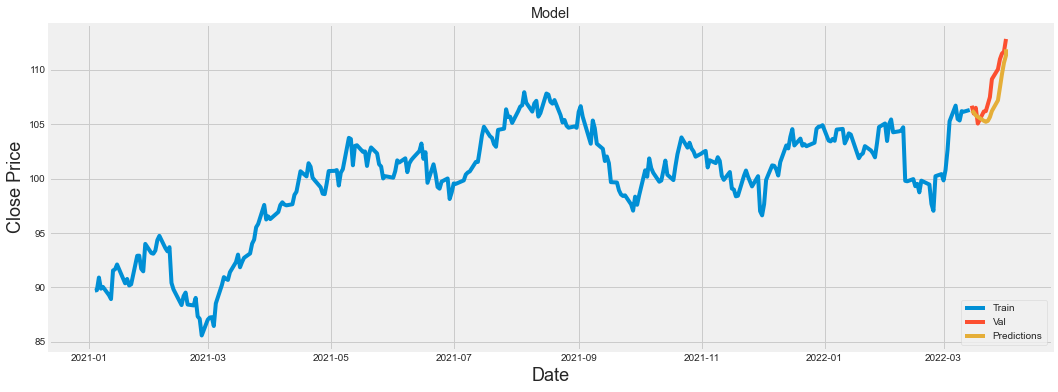

In [9]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [10]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-03-15,106.690002,106.245216
2022-03-16,105.970001,106.080269
2022-03-17,106.500000,105.797623
2022-03-18,105.050003,105.670792
2022-03-21,106.160004,105.303978
2022-03-22,106.190002,105.212959
2022-03-23,106.830002,105.294830
2022-03-24,107.470001,105.634491
2022-03-25,109.129997,106.202713
